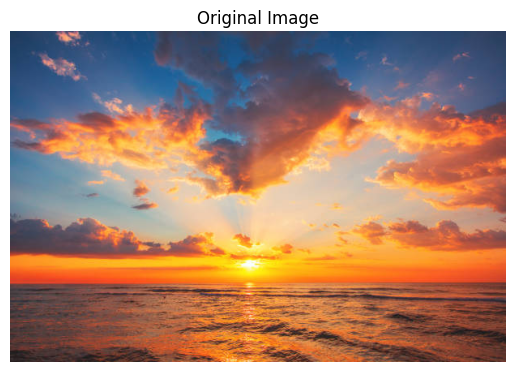

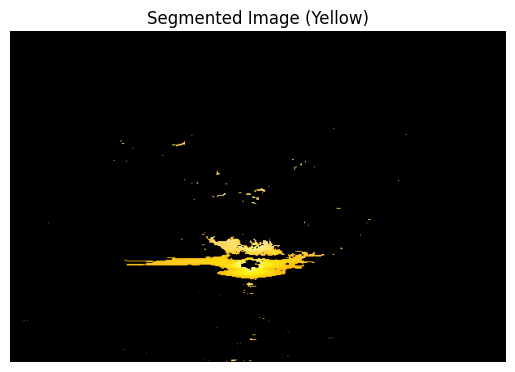

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# In[42]:Read the image and convert the image into RGB
image_path = 'sunset.jpg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# In[44]:Display the image
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()


# In[45]:Set the pixels to display the ROI
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_yellow = np.array([22, 93, 0])#choose the RGB values accordingly to display specific color
upper_yellow = np.array([45, 255, 255])
mask = cv2.inRange(hsv_img, lower_yellow, upper_yellow)


# In[48]:Perform bit wise conjunction of the two arrays  using bitwise_and
segmented_image = cv2.bitwise_and(img, img, mask=mask)


# In[49]:Convert the image from BGR2RGB
segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)


# In[50]:Display the segmented ROI from an image.
plt.imshow(segmented_image_rgb)
plt.title('Segmented Image (Yellow)')
plt.axis('off')
plt.show()

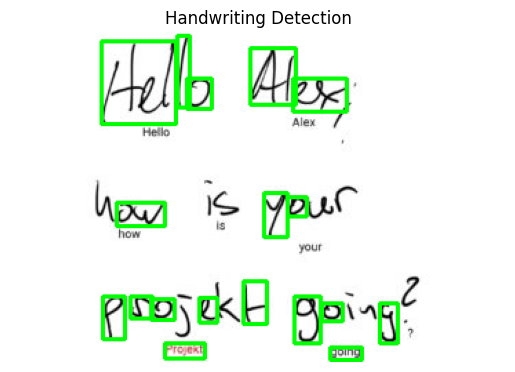

In [ ]:


import cv2
import numpy as np
import matplotlib.pyplot as plt


# In[3]:Define a function to read the image,Convert the image to grayscale,
#Apply Gaussian blur to reduce noise and improve edge detection,
#Use Canny edge detector to find edges in the image,
#Find contours in the edged image,
#Filter contours based on area to keep only potential text regions,
#Draw bounding boxes around potential text regions.


def detect_handwriting(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detector to find edges in the image
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area to keep only potential text regions
    min_area = 100
    text_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    # Draw bounding boxes around potential text regions
    img_copy = img.copy()
    for contour in text_contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the result
    img_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title('Handwriting Detection')
    plt.axis('off')
    plt.show()

# Path to the image containing handwriting
image_path ='handwriting.jpg'

# Perform handwriting detection
detect_handwriting(image_path)
# Display the image

In [ ]:

import cv2
model=cv2.dnn_DetectionModel('frozen_inference_graph.pb','ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt')

classLabels = []
file_name='Labels.txt'
with open(file_name,'rt')as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

print(classLabels)
print(len(classLabels))
img=cv2.imread('cow.jpg')
plt.imshow(img)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)#255/2=127.5
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)
print(ClassIndex)
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(0,0,255),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(255,0,0),thickness=1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

SystemError: <class 'cv2.dnn.DetectionModel'> returned a result with an exception set

In [ ]:
config_file = './models/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = './models/frozen_inference_graph.pb'




In [ ]:
import os
print(os.path.exists(config_file))  # Should return True
print(os.path.exists(frozen_model))  # Should return True


False
False


In [ ]:
!mkdir -p models
!mv /content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt ./models/
!mv /content/frozen_inference_graph.pb ./models/


In [ ]:
import os
print(os.path.exists('./models/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'))  # Should return True
print(os.path.exists('./models/frozen_inference_graph.pb'))  # Should return True


True
True


In [ ]:
# Import necessary packages
import cv2
import matplotlib.pyplot as plt

# Set and add the config_file,weights to ur folder.
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

# Use a pretrained Dnn model (MobileNet-SSD v3)
model=cv2.dnn_DetectionModel(frozen_model,config_file)

# Create a classLabel and print the same
classLabels = []
file_name='Labels.txt'
with open(file_name,'rt')as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

# Print the classLabels
print(classLabels)
print(len(classLabels))

# Display the image using imshow()
img=cv2.imread('car.jpeg')
plt.imshow(img)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Set the model and Threshold to 0.5
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)#255/2=127.5
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)
print(ClassIndex)


#Flatten the index,confidence.
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(0,0,255),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(255,0,0),thickness=1)


# Display the result.
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


SystemError: <class 'cv2.dnn.DetectionModel'> returned a result with an exception set